In [53]:
Dir = r'C:\Users\Administrator\Documents\GitHub\AAE625_25'

In [54]:
import pandas as pd

# Import AirPassengers.csv 
df_airp = pd.read_csv(Dir + '/AirPassengers.csv')

In [55]:
df_airp.rename(columns={'Month': 'Date', '#Passengers': 'Passengers'}, inplace=True)

(array([-8036., -7305., -6575., -5844., -5114., -4383., -3653., -2922.]),
 [Text(-8036.0, 0, '1948'),
  Text(-7305.0, 0, '1950'),
  Text(-6575.0, 0, '1952'),
  Text(-5844.0, 0, '1954'),
  Text(-5114.0, 0, '1956'),
  Text(-4383.0, 0, '1958'),
  Text(-3653.0, 0, '1960'),
  Text(-2922.0, 0, '1962')])

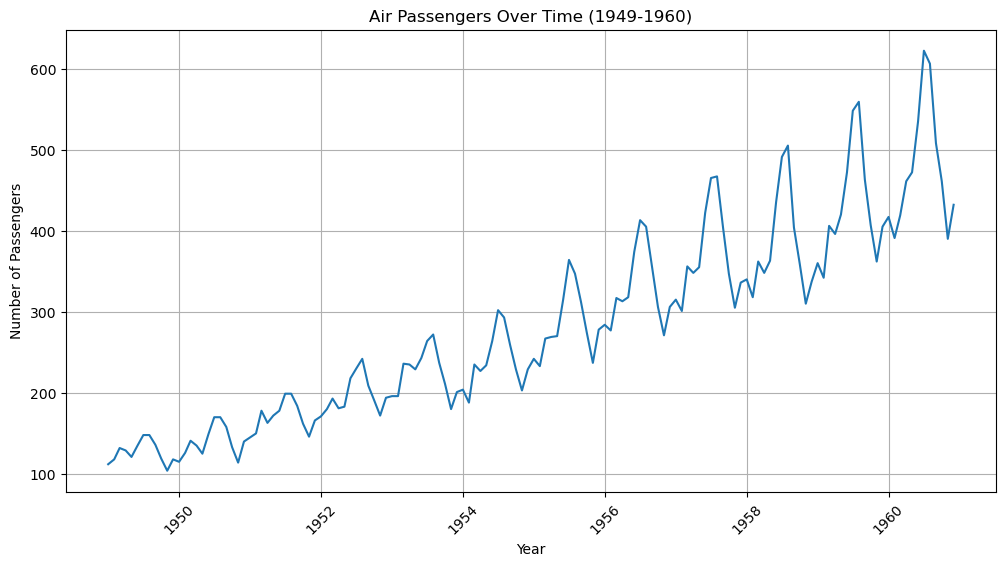

In [56]:
# Convert Month (date column) to datetime for better plotting
df_airp['Date'] = pd.to_datetime(df_airp['Date'])

# Create the line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_airp['Date'], df_airp['Passengers'])
plt.title('Air Passengers Over Time (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.xticks(rotation=45)

In [57]:
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# add a column for trend analysis
df_airp['T'] = np.arange(len(df_airp))
df_airp.head()


,Date,Passengers,T
0,1949-01-01,112,0
1,1949-02-01,118,1
2,1949-03-01,132,2
3,1949-04-01,129,3
4,1949-05-01,121,4


In [58]:
#develop a linear regression model for the data
X = df_airp['T']
y = df_airp['Passengers']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           4.02e-61
Time:                        22:02:26   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3100      7.636     11.826      0.0

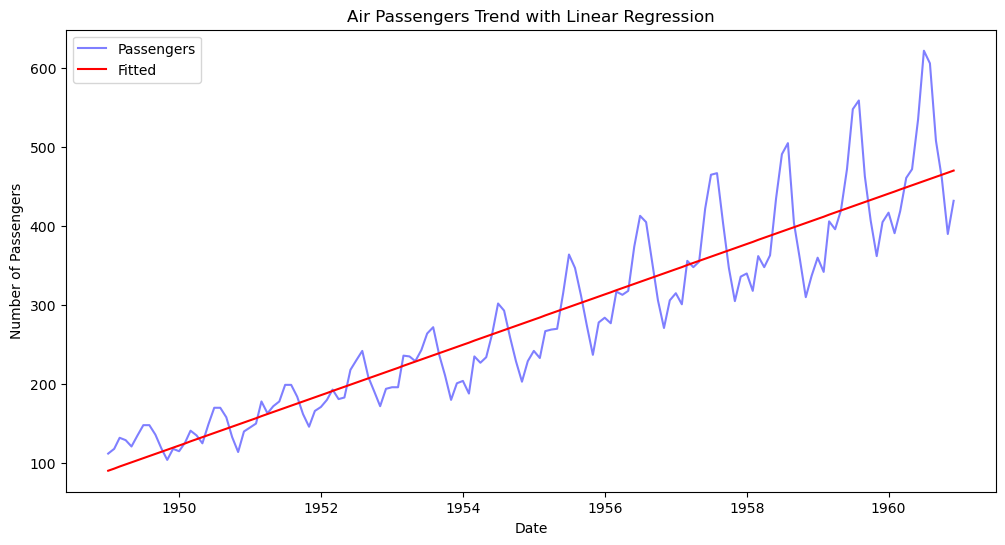

In [62]:
# Create figure with actual data and regression line
plt.figure(figsize=(12, 6))

# Plot actual data points
plt.plot(df_airp['Date'], df_airp['Passengers'], color='blue', alpha=0.5, label='Passengers')

# Plot regression line using model results
df_airp['fitted'] = results.fittedvalues
plt.plot(df_airp['Date'], df_airp['fitted'], color='red', label='Fitted')

# Customize the plot
plt.title('Air Passengers Trend with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [70]:
# Prediction of 1961:
n = 12 
X_pred = np.arange(len(df_airp)+ 1, len(df_airp) + 1+ n)
X_pred = sm.add_constant(X_pred)
y_pred = results.predict(X_pred)
print('X_pred:',X_pred)
print('y_pred:',y_pred)


X_pred: [[  1. 145.]
 [  1. 146.]
 [  1. 147.]
 [  1. 148.]
 [  1. 149.]
 [  1. 150.]
 [  1. 151.]
 [  1. 152.]
 [  1. 153.]
 [  1. 154.]
 [  1. 155.]
 [  1. 156.]]
y_pred: [475.60162835 478.25881226 480.91599617 483.57318008 486.23036398
 488.88754789 491.5447318  494.20191571 496.85909962 499.51628352
 502.17346743 504.83065134]


In [79]:
# Create a DataFrame for 1961 predictions
df_pred = pd.date_range(start='1961-01-01', periods=n, freq='MS')
forecast_1961 = pd.DataFrame({
    'Date': df_pred,
    'Predicted_Passengers': np.round(y_pred)
})

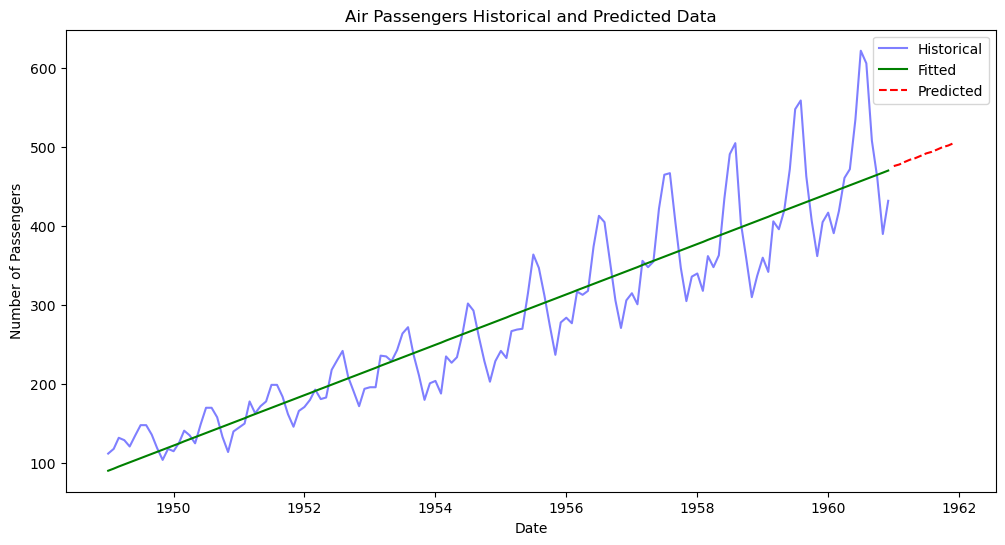

In [81]:
#Plot out the historical data and the predicted values
plt.figure(figsize=(12, 6))
# Plot historical data
plt.plot(df_airp['Date'], df_airp['Passengers'], color='blue', alpha=0.5, label='Historical')
# Plot fitted values
plt.plot(df_airp['Date'], df_airp['fitted'], color='green', label='Fitted')
# Plot predictions
plt.plot(df_pred, forecast_1961['Predicted_Passengers'], color='red', linestyle='dashed', label='Predicted')
plt.title('Air Passengers Historical and Predicted Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()



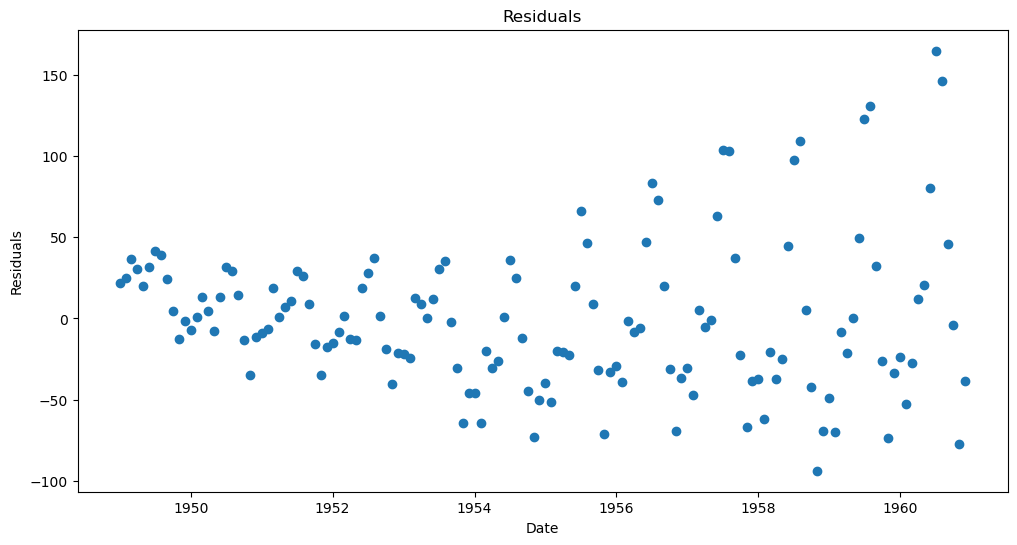

In [83]:
#Check Assumption - Homoscedasticity
df_airp['Residuals'] = results.resid
plt.figure(figsize=(12,6))
plt.scatter(df_airp['Date'],df_airp['Residuals'])
plt.title ('Residuals') 
plt.xlabel('Date')
plt.ylabel('Residuals') 
plt.show()

In [85]:
#Assumption was violated
#Transform y to ln(y)

df_airp['lg_passengers']=np.log(df_airp['Passengers'])
X = df_airp['T']
y = df_airp['lg_passengers']
X = sm.add_constant(X)
model_lg = sm.OLS(y, X)
results_lg = model_lg.fit()
print(results_lg.summary())



                            OLS Regression Results                            
Dep. Variable:          lg_passengers   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1300.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           2.41e-73
Time:                        22:44:52   Log-Likelihood:                 80.794
No. Observations:                 144   AIC:                            -157.6
Df Residuals:                     142   BIC:                            -151.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8237      0.023    209.248      0.0

In [86]:
# generate m1 − m12 to indicate different month from Date .
# creat 12 variables . For example , 1949−01 is m1 , 1949−02 is m2,etc .
df_airp['Date'] = pd.to_datetime(df_airp['Date'])
df_airp['m1'] = np.where(df_airp['Date'].dt.month == 1,1,0)
df_airp['m2'] = np.where(df_airp['Date'].dt.month == 2,1,0)
df_airp['m3'] = np.where(df_airp['Date'].dt.month == 3,1,0)
df_airp['m4'] = np.where(df_airp['Date'].dt.month == 4,1,0)
df_airp['m5'] = np.where(df_airp['Date'].dt.month == 5,1,0)
df_airp['m6'] = np.where(df_airp['Date'].dt.month == 6,1,0)
df_airp['m7'] = np.where(df_airp['Date'].dt.month == 7,1,0)
df_airp['m8'] = np.where(df_airp['Date'].dt.month == 8,1,0)
df_airp['m9'] = np.where(df_airp['Date'].dt.month == 9,1,0)
df_airp['m10'] = np.where(df_airp['Date'].dt.month == 10,1,0)
df_airp['m11'] = np.where(df_airp['Date'].dt.month == 11,1,0)
df_airp['m12'] = np.where(df_airp['Date'].dt.month == 12,1,0)
print(df_airp.head())

        Date  Passengers  T      fitted  Residuals  lg_passengers  m1  m2  m3  \
0 1949-01-01         112  0   90.309962  21.690038       4.718499   1   0   0   
1 1949-02-01         118  1   92.967146  25.032854       4.770685   0   1   0   
2 1949-03-01         132  2   95.624330  36.375670       4.882802   0   0   1   
3 1949-04-01         129  3   98.281513  30.718487       4.859812   0   0   0   
4 1949-05-01         121  4  100.938697  20.061303       4.795791   0   0   0   

   m4  m5  m6  m7  m8  m9  m10  m11  m12  
0   0   0   0   0   0   0    0    0    0  
1   0   0   0   0   0   0    0    0    0  
2   0   0   0   0   0   0    0    0    0  
3   1   0   0   0   0   0    0    0    0  
4   0   1   0   0   0   0    0    0    0  


In [88]:
# develop a multiple regression model for the data
X = df_airp[['T','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']]
y = df_airp['Passengers']
X = sm.add_constant(X)
model_T_S = sm.OLS(y, X)
results_T_S = model_T_S.fit()
print(results_T_S.summary())


                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     236.5
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           1.71e-82
Time:                        22:53:46   Log-Likelihood:                -668.50
No. Observations:                 144   AIC:                             1363.
Df Residuals:                     131   BIC:                             1402.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9880      8.626      6.607      0.0

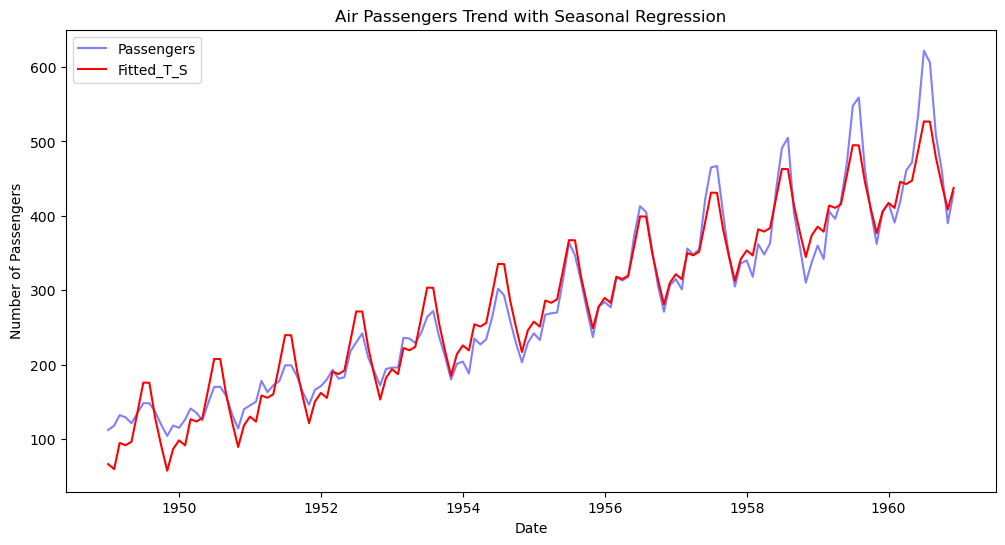

In [89]:
#generate prediction and plot out the historical data and the predicted values
df_airp['fitted_T_S'] = results_T_S.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(df_airp['Date'], df_airp['Passengers'], color='blue', alpha=0.5, label='Passengers')
plt.plot(df_airp['Date'], df_airp['fitted_T_S'], color='red', label='Fitted_T_S')
plt.title('Air Passengers Trend with Seasonal Regression')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [ ]:
# Generat predictions for 1961 with the seasonal model
n = 12
# Create future dates
future_dates = pd.date_range(start='1961-01-01', periods=n, freq='MS')

# Create prediction DataFrame with trend and seasonal dummies
X_pred_T_S = pd.DataFrame()
X_pred_T_S['T'] = np.arange(len(df_airp), len(df_airp) + n)
# Add monthly dummies
for i in range(1, 12):  # Note: we only need m1 through m11 as per original model
	X_pred_T_S[f'm{i}'] = (future_dates.month == i).astype(int)

# Add constant
X_pred_T_S = sm.add_constant(X_pred_T_S)

# Make predictions
y_pred_T_S = results_T_S.predict(X_pred_T_S)
print('Predictions for 1961:', y_pred_T_S)

Predictions for 1961: 0     449.255682
1     442.505682
2     477.672348
3     474.589015
4     479.339015
5     519.172348
6     558.839015
7     558.589015
8     509.922348
9     474.089015
10    440.339015
11    469.339015
dtype: float64


In [ ]:
# Create a DataFrame for 1961 predictions
df_pred_T_S = pd.date_range(start='1961-01-01', periods=n, freq='MS')
forecast_1961_T_S = pd.DataFrame({
    'Date': df_pred_T_S,
    'Predicted_Passengers_T_S': np.round(y_pred_T_S)
})

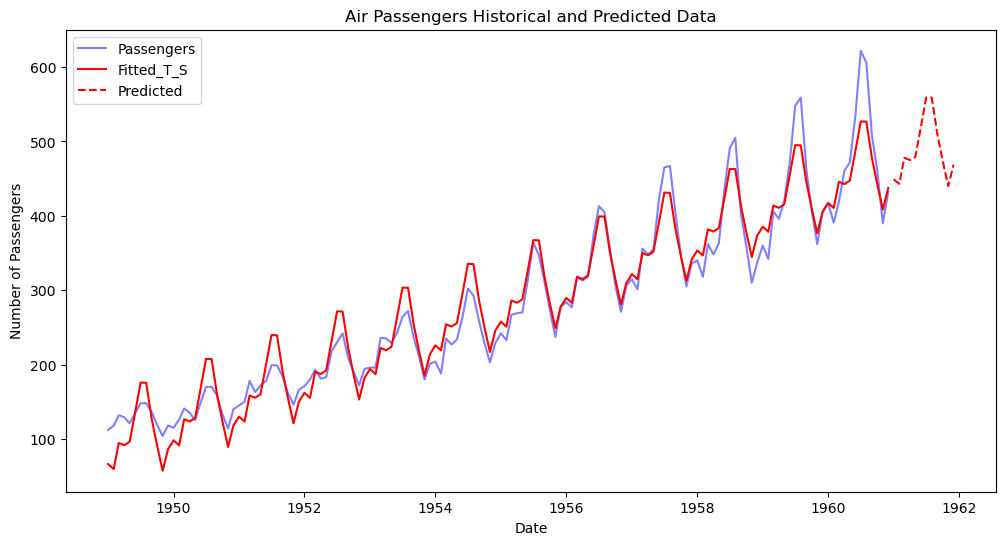

In [94]:
#Plot out the historical data and the predicted values
plt.figure(figsize=(12, 6))

plt.plot(df_airp['Date'], df_airp['Passengers'], color='blue', alpha=0.5, label='Passengers')
plt.plot(df_airp['Date'], df_airp['fitted_T_S'], color='red', label='Fitted_T_S')

plt.plot(df_pred_T_S, forecast_1961_T_S['Predicted_Passengers'], color='red', linestyle='dashed', label='Predicted')
plt.title('Air Passengers Historical and Predicted Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [95]:
# Create a combined DataFrame with historical and forecast data
historical_data = df_airp[['Date', 'Passengers']].copy()
historical_data['Type'] = 'Historical'

forecast_data = forecast_1961_T_S.copy()
forecast_data.rename(columns={'Predicted_Passengers': 'Passengers'}, inplace=True)
forecast_data['Type'] = 'Forecast'

# Concatenate historical and forecast data
combined_data = pd.concat([historical_data, forecast_data], ignore_index=True)

# Sort by date to ensure chronological order
combined_data = combined_data.sort_values('Date')

# Export to CSV
combined_data.to_csv(Dir + '/air_passengers_with_forecast.csv', index=False)
print("Data exported successfully to 'air_passengers_with_forecast.csv'")

Data exported successfully to 'air_passengers_with_forecast.csv'
